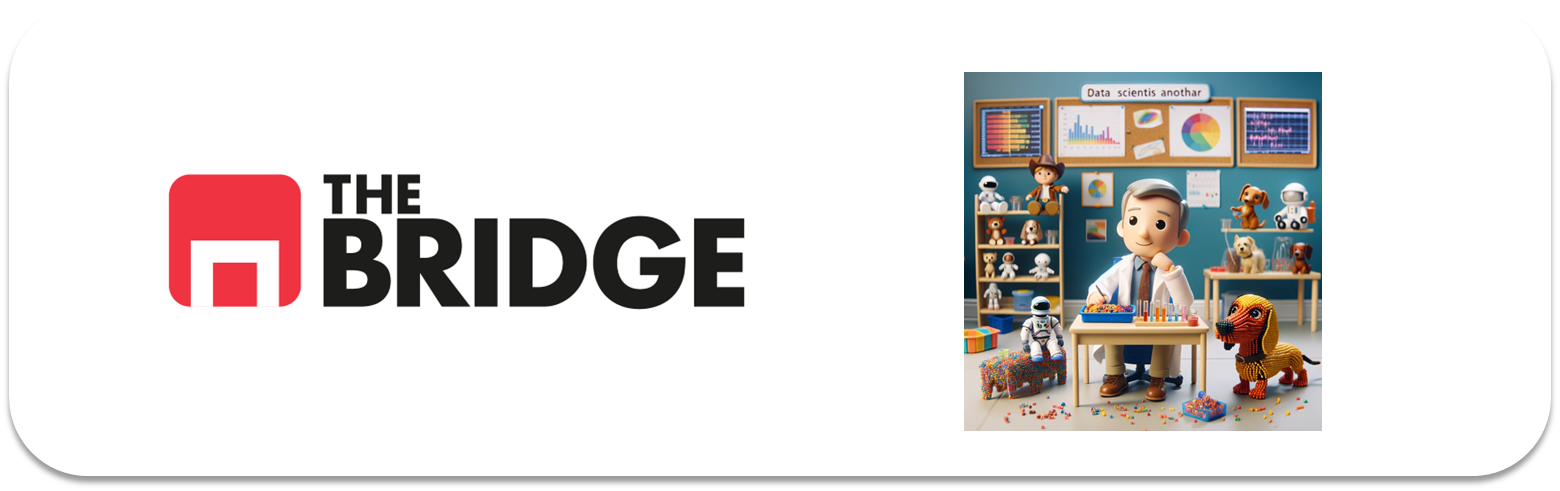

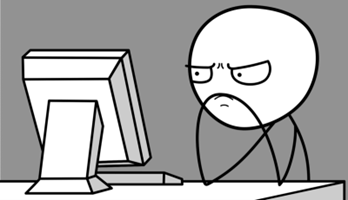

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [81]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear una lista para almacenar los resultados
    resultados = []

    # Iterar sobre las columnas del dataframe
    for col in df_in.columns:
        valores_unicos = df_in[col].nunique()  # Cardinalidad
        total_valores = len(df_in[col])
        porcentaje = valores_unicos / total_valores if total_valores > 0 else 0  # Porcentaje de valores únicos

        # Clasificación del tipo de columna
        if valores_unicos == 2:
            tipo = "Binaria"
        elif valores_unicos < umbral_categoria:
            tipo = "Categórica"
        elif porcentaje >= umbral_continua:
            tipo = "Numerica Continua"
        else:
            tipo = "Numerica Discreta"

        # Añadir los resultados a la lista
        resultados.append({
            'columna': col,
            'cardinalidad': valores_unicos,
            'porcentaje_cardinalidad': porcentaje,
            'tipo': tipo
        })

    # Convertir la lista a un DataFrame
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [82]:
# Analizar la columna Year
if 'Year' in admission_data.columns:
    print("\nAnálisis de la variable 'Year':")
    print(admission_data['Year'].describe())
    print("\nValores únicos en 'Year':", admission_data['Year'].unique())
else:
    print("\nLa variable 'Year' no está en el dataset.")



Análisis de la variable 'Year':
count    12763.0
mean      1973.0
std          0.0
min       1973.0
25%       1973.0
50%       1973.0
75%       1973.0
max       1973.0
Name: Year, dtype: float64

Valores únicos en 'Year': [1973]


### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None

Frecuencias Absolutas:
Major
Other                                                      

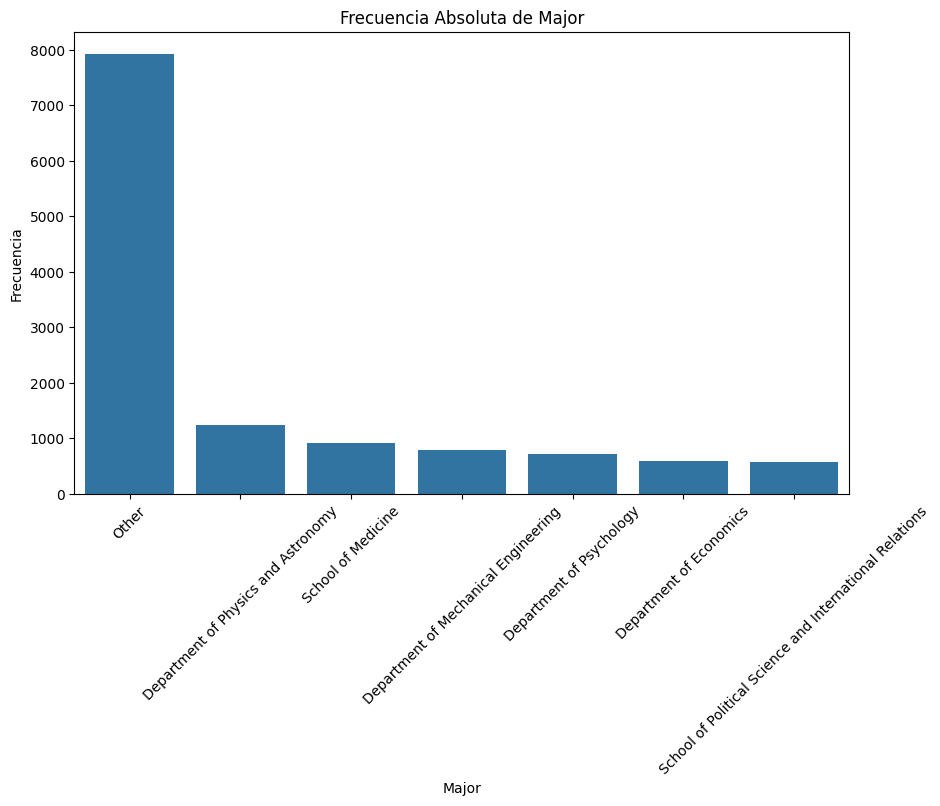

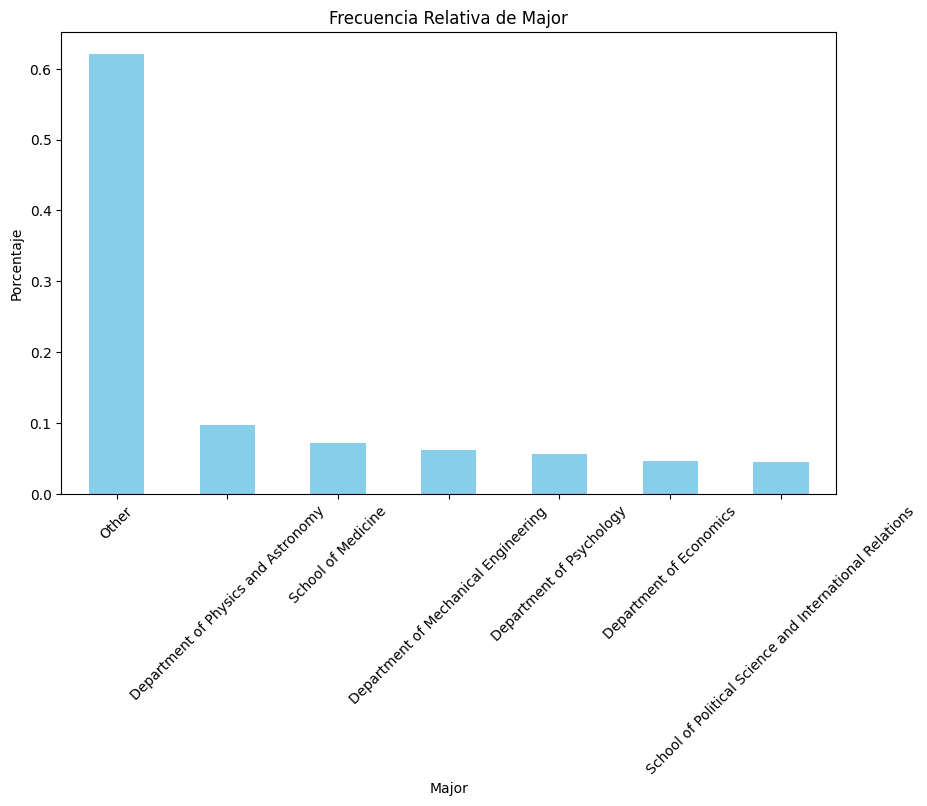

In [83]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear una lista para almacenar los resultados
    resultados = []

    # Iterar sobre las columnas del dataframe
    for col in df_in.columns:
        valores_unicos = df_in[col].nunique()  # Cardinalidad
        total_valores = len(df_in[col])
        porcentaje = valores_unicos / total_valores if total_valores > 0 else 0  # Porcentaje de valores únicos

        # Clasificación del tipo de columna
        if valores_unicos == 2:
            tipo = "Binaria"
        elif valores_unicos < umbral_categoria:
            tipo = "Categórica"
        elif porcentaje >= umbral_continua:
            tipo = "Numerica Continua"
        else:
            tipo = "Numerica Discreta"

        # Añadir los resultados a la lista
        resultados.append({
            'columna': col,
            'cardinalidad': valores_unicos,
            'porcentaje_cardinalidad': porcentaje,
            'tipo': tipo
        })

    # Convertir la lista a un DataFrame
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

def analiza_frecuencias_major(df, columna):
    if columna not in df.columns:
        print(f"La columna {columna} no existe en el DataFrame.")
        return

    # Frecuencias absolutas
    frecuencias_abs = df[columna].value_counts()
    print("\nFrecuencias Absolutas:")
    print(frecuencias_abs)

    # Frecuencias relativas
    frecuencias_rel = df[columna].value_counts(normalize=True)
    print("\nFrecuencias Relativas:")
    print(frecuencias_rel)

    # Gráfico de frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=columna, order=frecuencias_abs.index)
    plt.title(f"Frecuencia Absoluta de {columna}")
    plt.ylabel("Frecuencia")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de frecuencias relativas
    plt.figure(figsize=(10, 6))
    frecuencias_rel.plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia Relativa de {columna}")
    plt.ylabel("Porcentaje")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

# Análisis de frecuencias de la columna "Major"
analiza_frecuencias_major(admission_data, "Major")


### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

El análisis de la columna Major ofrece una perspectiva inicial sobre la distribución de los programas académicos.

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [84]:
print(admission_data.columns)


Index(['Unnamed: 0', 'Year', 'Major', 'Gender', 'Admission'], dtype='object')


Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None

Frecuencias Absolutas para Major:
Major
Other                                           

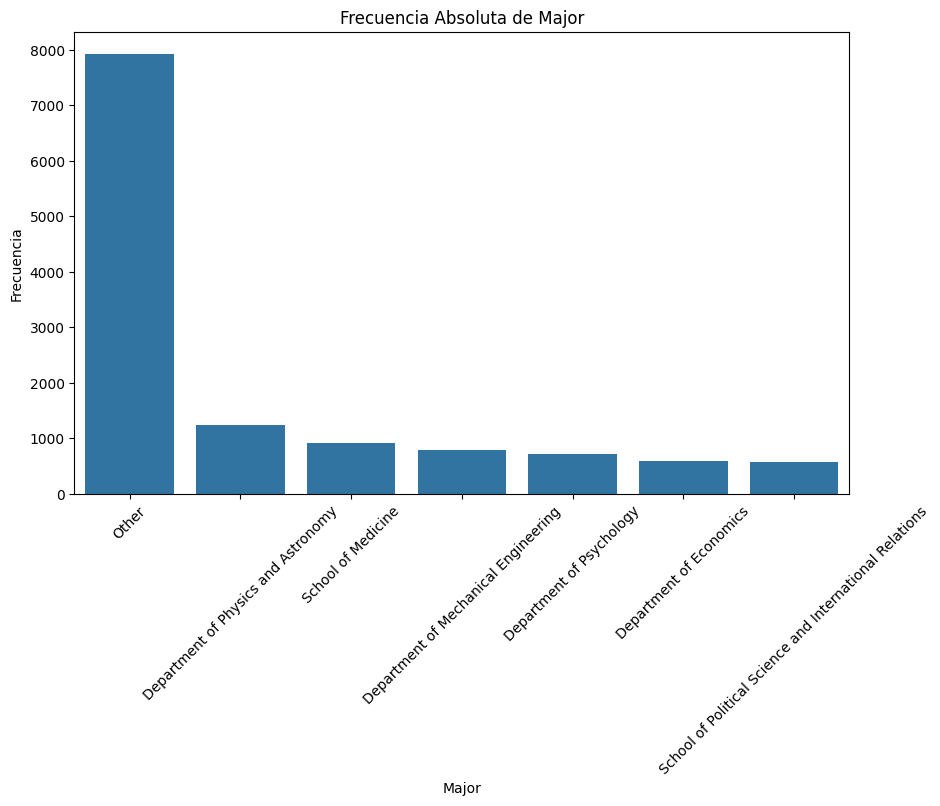

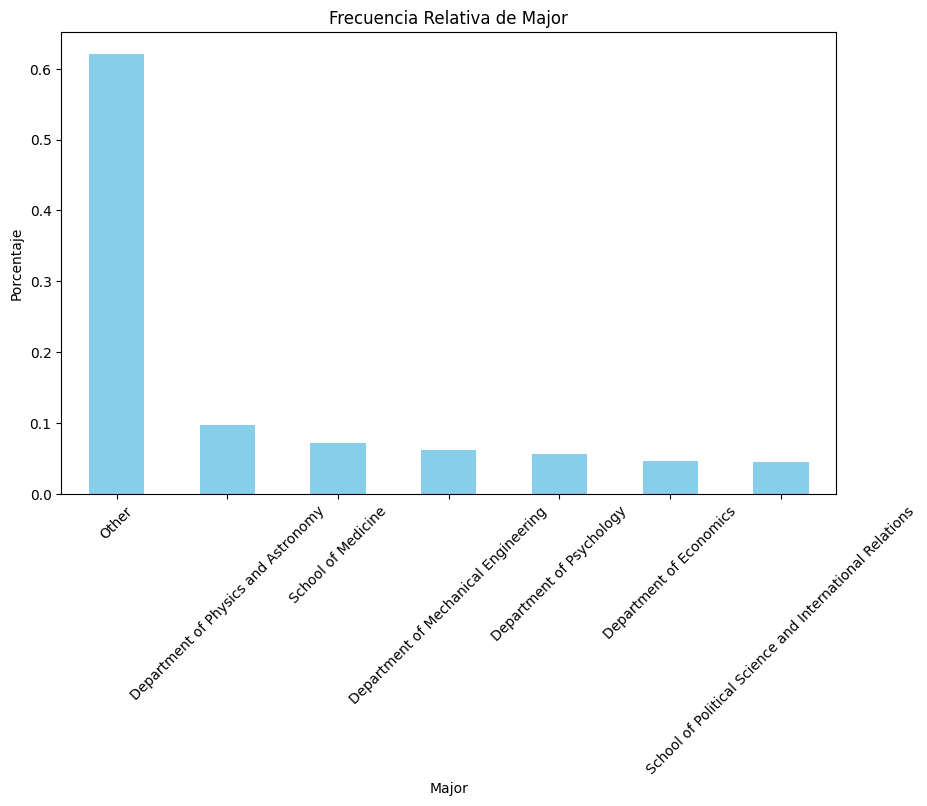


Frecuencias Absolutas para Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencias Relativas para Gender:
Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


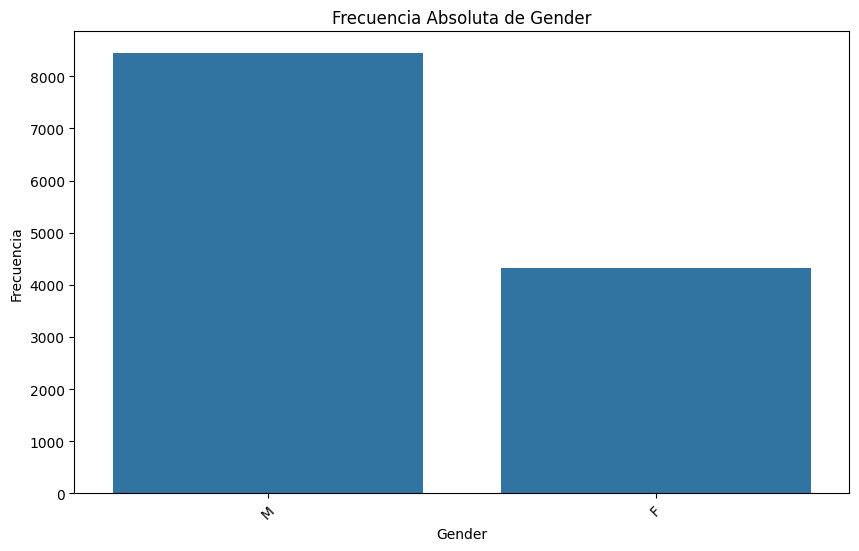

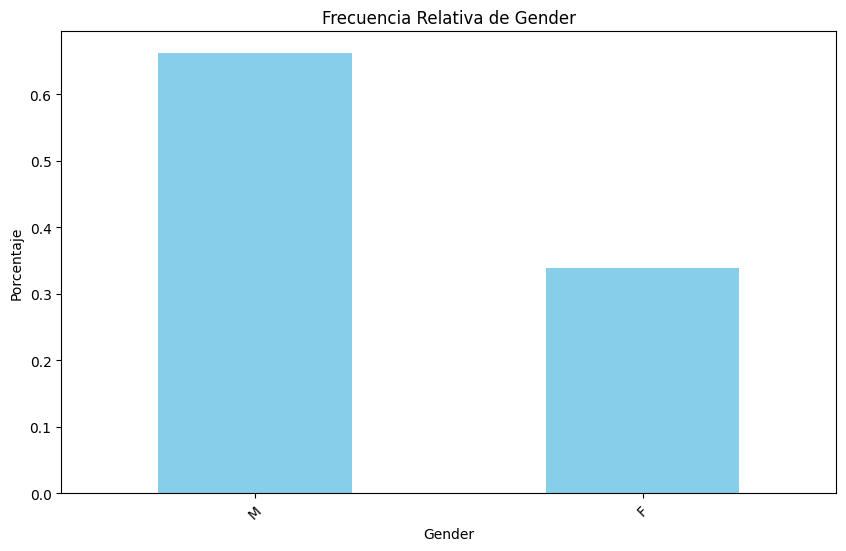

In [85]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear una lista para almacenar los resultados
    resultados = []

    # Iterar sobre las columnas del dataframe
    for col in df_in.columns:
        valores_unicos = df_in[col].nunique()  # Cardinalidad
        total_valores = len(df_in[col])
        porcentaje = valores_unicos / total_valores if total_valores > 0 else 0  # Porcentaje de valores únicos

        # Clasificación del tipo de columna
        if valores_unicos == 2:
            tipo = "Binaria"
        elif valores_unicos < umbral_categoria:
            tipo = "Categórica"
        elif porcentaje >= umbral_continua:
            tipo = "Numerica Continua"
        else:
            tipo = "Numerica Discreta"

        # Añadir los resultados a la lista
        resultados.append({
            'columna': col,
            'cardinalidad': valores_unicos,
            'porcentaje_cardinalidad': porcentaje,
            'tipo': tipo
        })

    # Convertir la lista a un DataFrame
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

def analiza_frecuencias(df, columna):
    if columna not in df.columns:
        print(f"La columna {columna} no existe en el DataFrame.")
        return

    # Frecuencias absolutas
    frecuencias_abs = df[columna].value_counts()
    print(f"\nFrecuencias Absolutas para {columna}:")
    print(frecuencias_abs)

    # Frecuencias relativas
    frecuencias_rel = df[columna].value_counts(normalize=True)
    print(f"\nFrecuencias Relativas para {columna}:")
    print(frecuencias_rel)

    # Gráfico de frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=columna, order=frecuencias_abs.index)
    plt.title(f"Frecuencia Absoluta de {columna}")
    plt.ylabel("Frecuencia")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de frecuencias relativas
    plt.figure(figsize=(10, 6))
    frecuencias_rel.plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia Relativa de {columna}")
    plt.ylabel("Porcentaje")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

# Análisis de frecuencias de la columna "Major"
analiza_frecuencias(admission_data, "Major")

# Análisis de frecuencias de la columna "Gender"
analiza_frecuencias(admission_data, "Gender")

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

Major: Se observa que algunos programas son significativamente más representados, mientras que otros tienen una frecuencia baja. Esto indica una distribución desigual entre los departamentos.

Gender: Existe un patrón claro de distribución de género. Cualquier desequilibrio podría ser indicativo de tendencias o sesgos en las admisiones.

Ambas variables muestran datos relevantes para estudiar posibles desigualdades en las admisiones universitarias.

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 


Frecuencias Absolutas para Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas para Admission:
Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


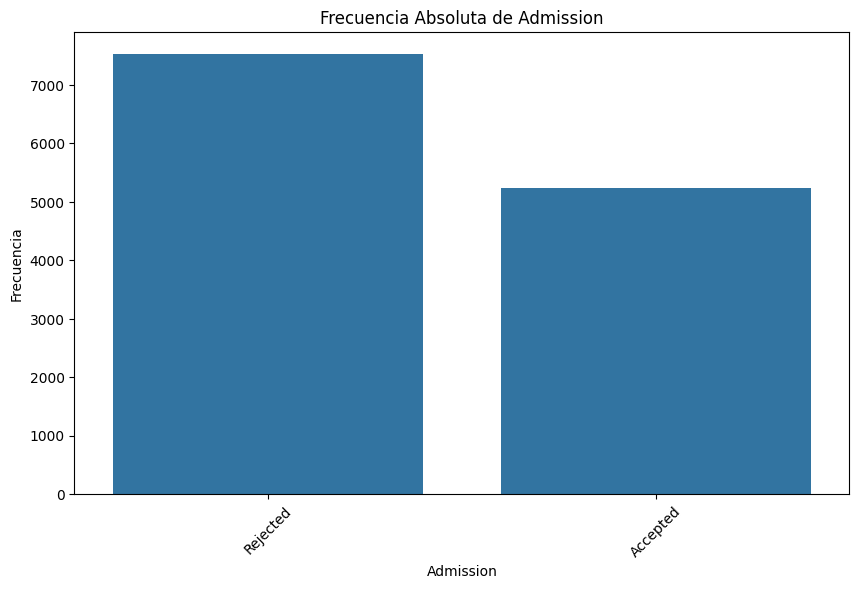

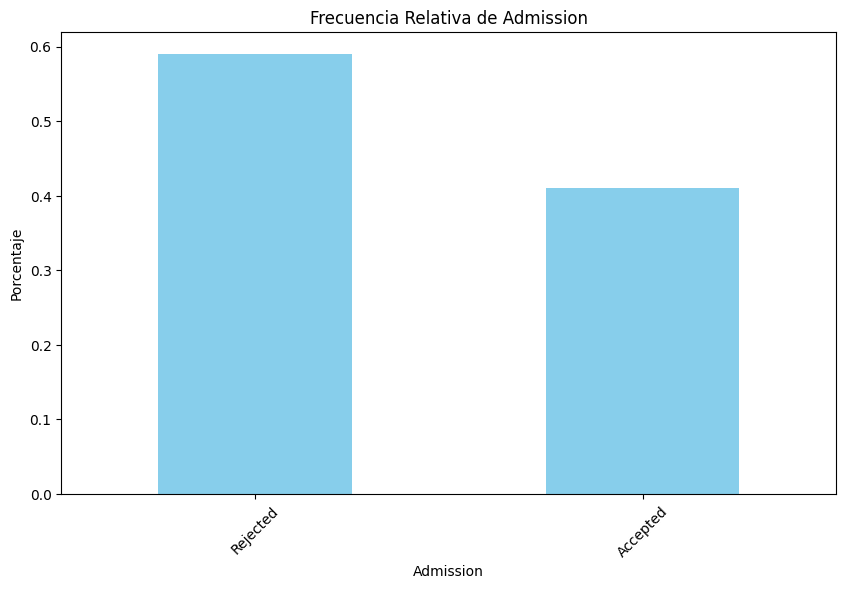

In [86]:
# Análisis de frecuencias de la columna "Admission"
analiza_frecuencias(admission_data, "Admission")

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

En la columna Admission, se observa que las frecuencias absolutas y relativas reflejan un patrón claro de admisiones aceptadas frente a rechazadas. Si una categoría predomina, podría ser un indicativo de criterios específicos o un desbalance. Este análisis es clave para identificar posibles sesgos cuando se cruza con otras variables como Gender o Major.


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None

Frecuencias Absolutas para Major:
Major
Other                                           

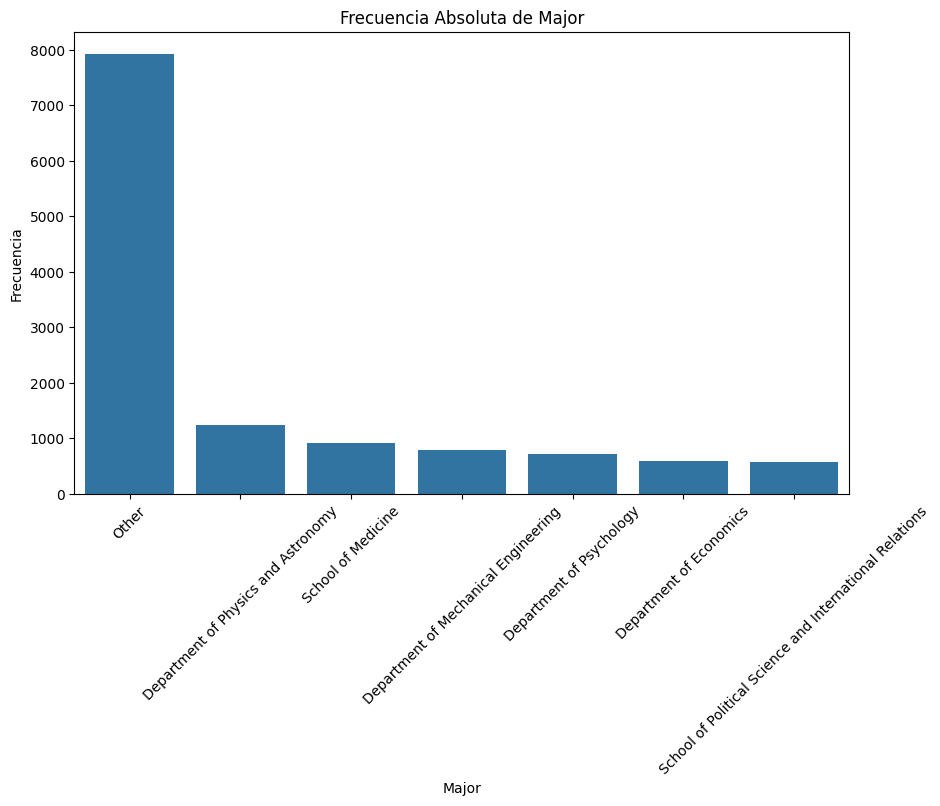

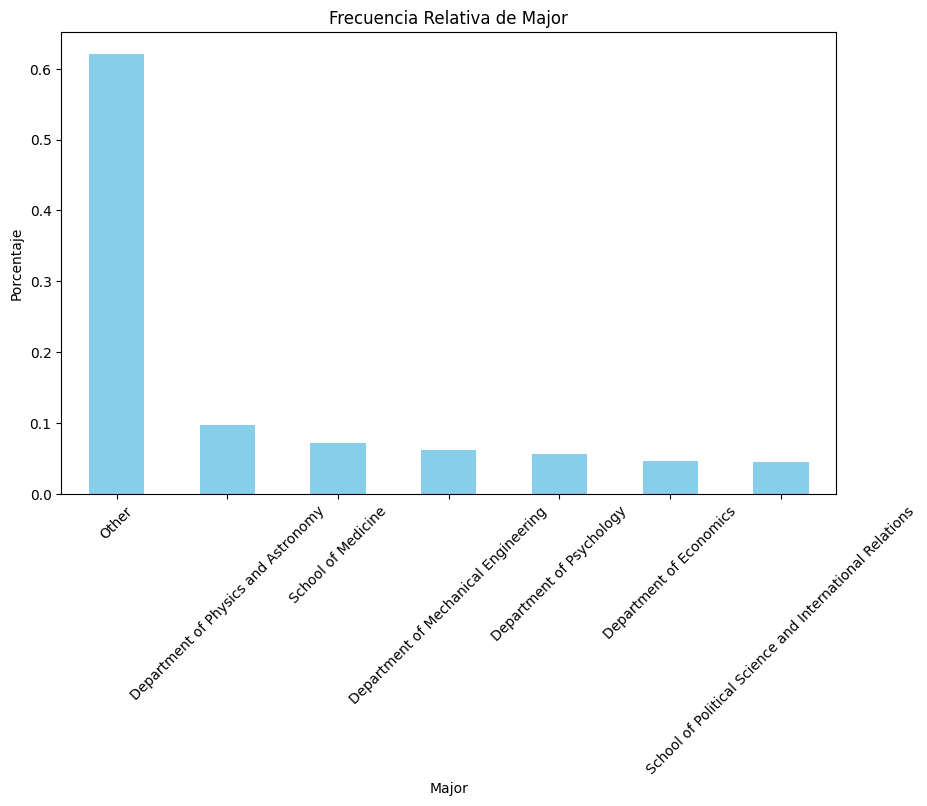


Frecuencias Absolutas para Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencias Relativas para Gender:
Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


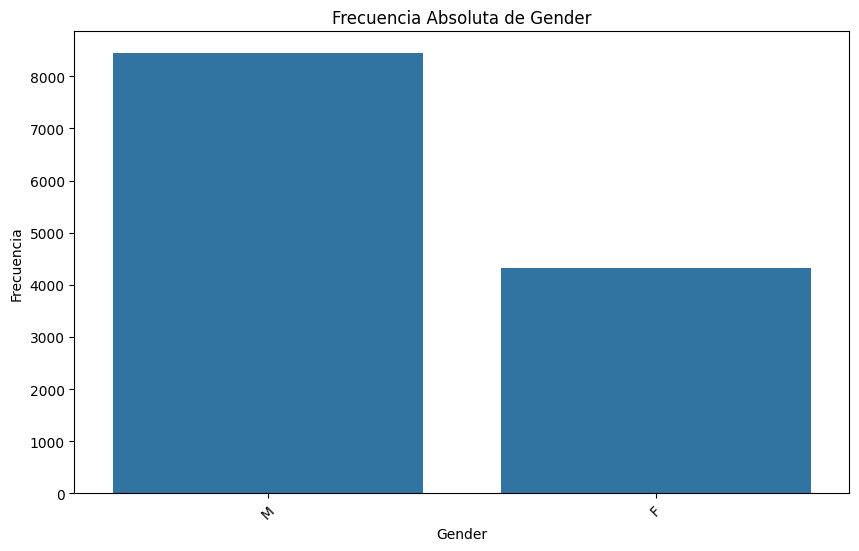

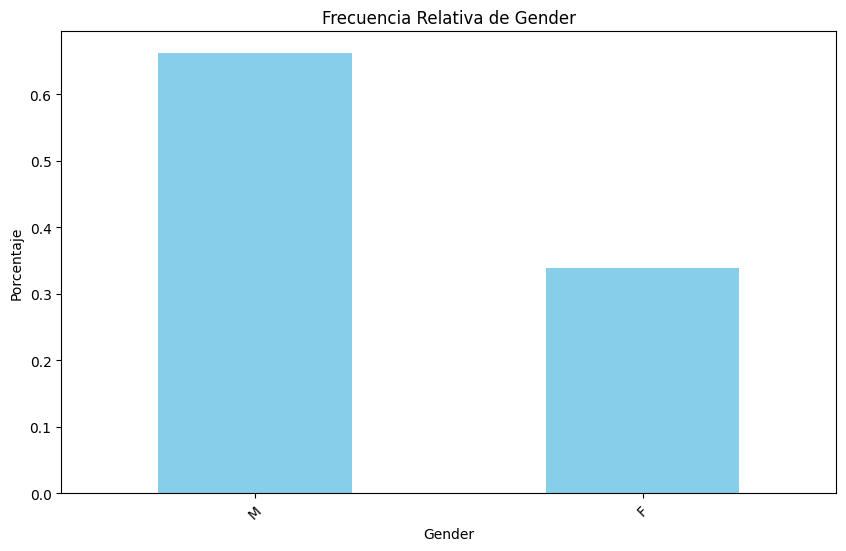


Frecuencias Absolutas para Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas para Admission:
Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


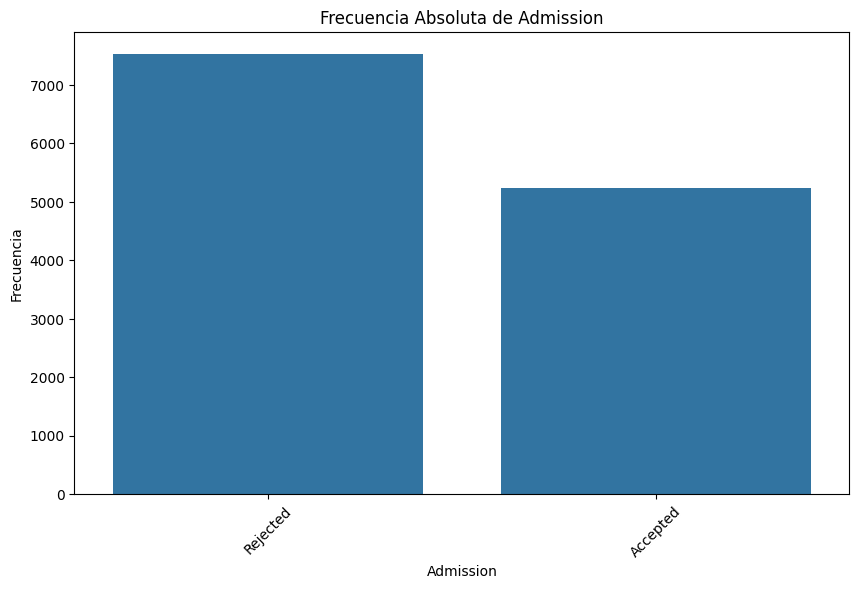

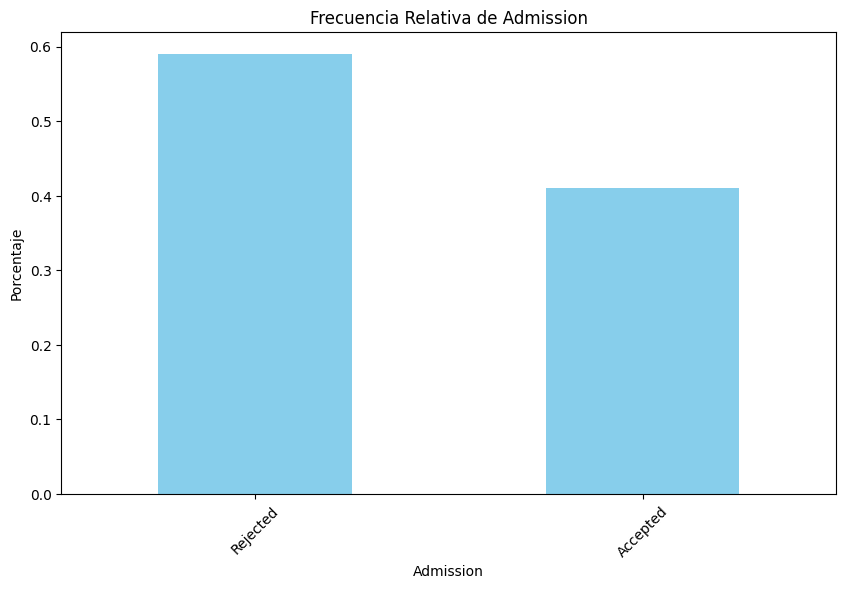


Medidas de tendencia central, posición y rangos de las variables numéricas:
         Unnamed: 0     Year
count  12763.000000  12763.0
mean    6381.000000   1973.0
std     3684.505078      0.0
min        0.000000   1973.0
25%     3190.500000   1973.0
50%     6381.000000   1973.0
75%     9571.500000   1973.0
max    12762.000000   1973.0


In [87]:
def analizar_variables_numericas(df):
    # Seleccionar variables numéricas
    numericas = df.select_dtypes(include=['number'])

    # Calcular medidas de tendencia central, posición y rangos
    resumen = numericas.describe(percentiles=[0.25, 0.5, 0.75])
    print("\nMedidas de tendencia central, posición y rangos de las variables numéricas:")
    print(resumen)

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

# Análisis de frecuencias de la columna "Major"
analiza_frecuencias(admission_data, "Major")

# Análisis de frecuencias de la columna "Gender"
analiza_frecuencias(admission_data, "Gender")

# Análisis de frecuencias de la columna "Admission"
analiza_frecuencias(admission_data, "Admission")

# Análisis de las medidas de tendencia central, posición y rangos
analizar_variables_numericas(admission_data)


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None

Frecuencias Absolutas para Major:
Major
Other                                           

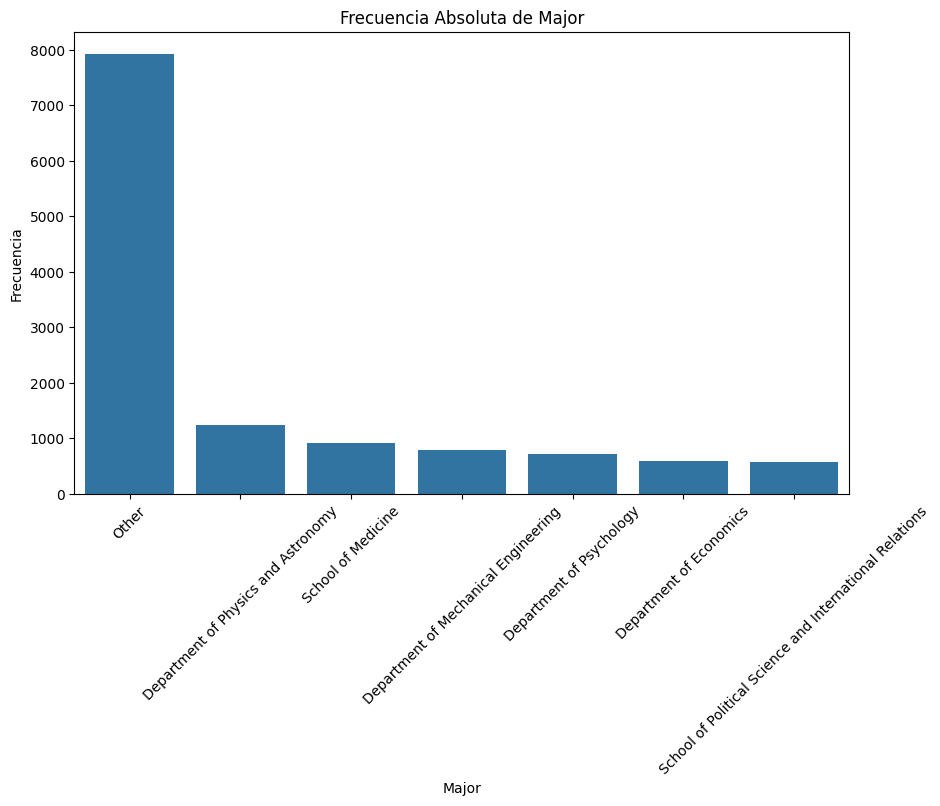

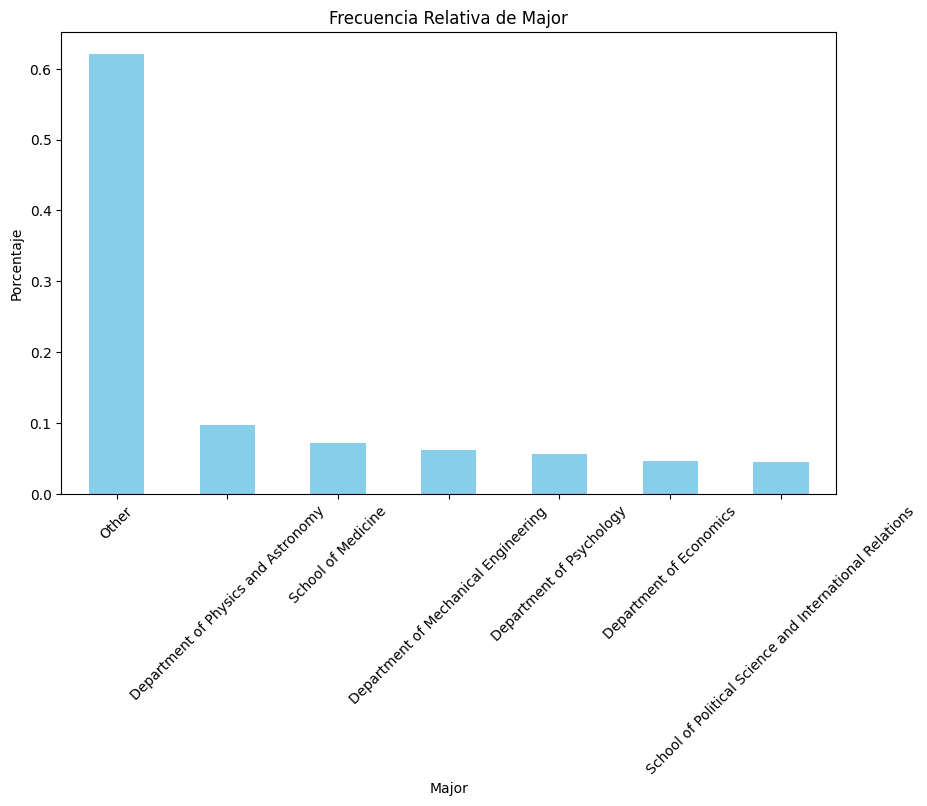


Frecuencias Absolutas para Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencias Relativas para Gender:
Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


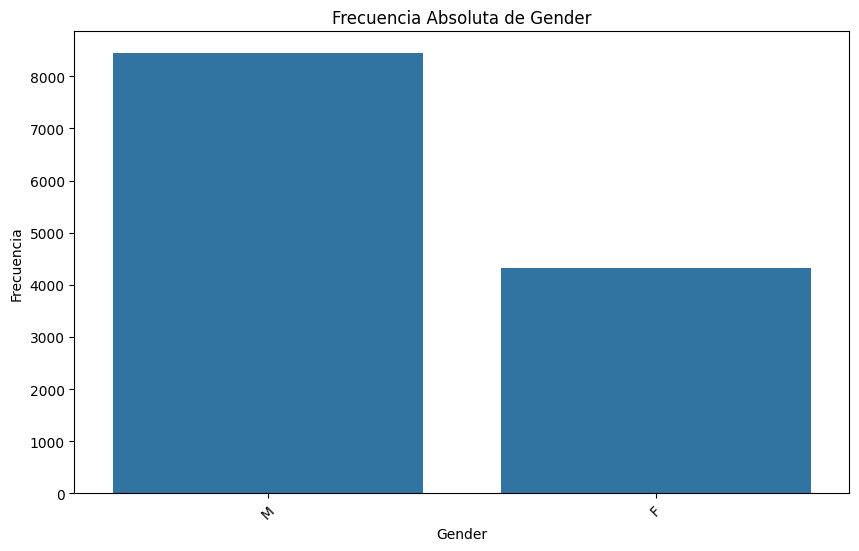

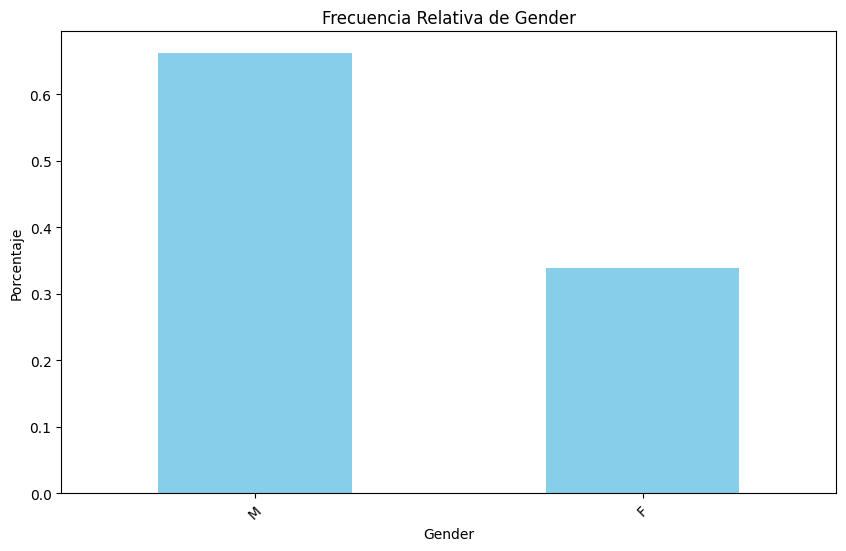


Frecuencias Absolutas para Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas para Admission:
Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


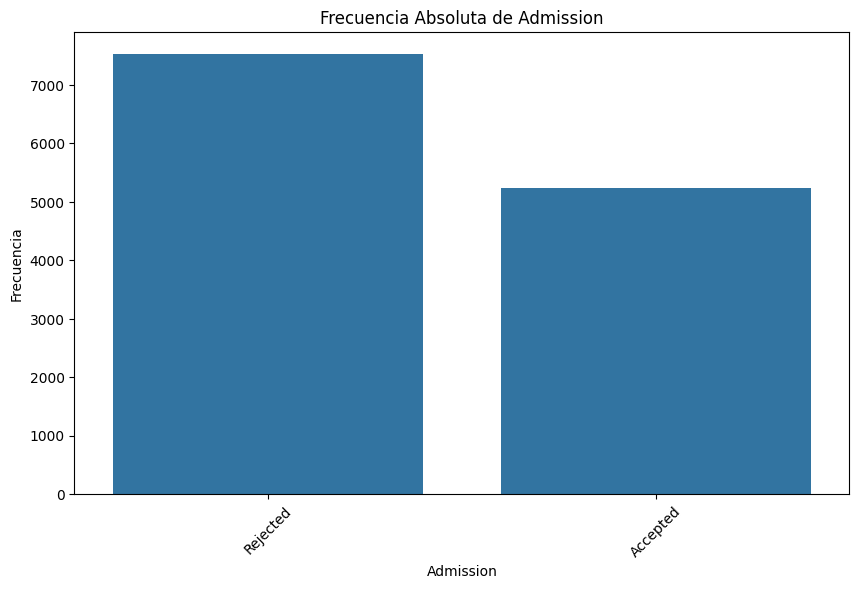

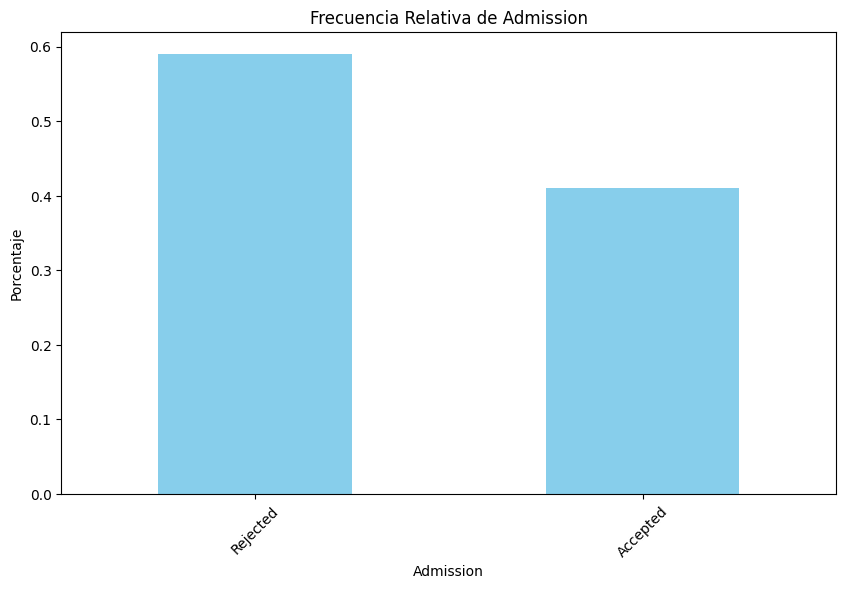


Medidas de tendencia central, posición y rangos de las variables numéricas:
         Unnamed: 0     Year
count  12763.000000  12763.0
mean    6381.000000   1973.0
std     3684.505078      0.0
min        0.000000   1973.0
25%     3190.500000   1973.0
50%     6381.000000   1973.0
75%     9571.500000   1973.0
max    12762.000000   1973.0


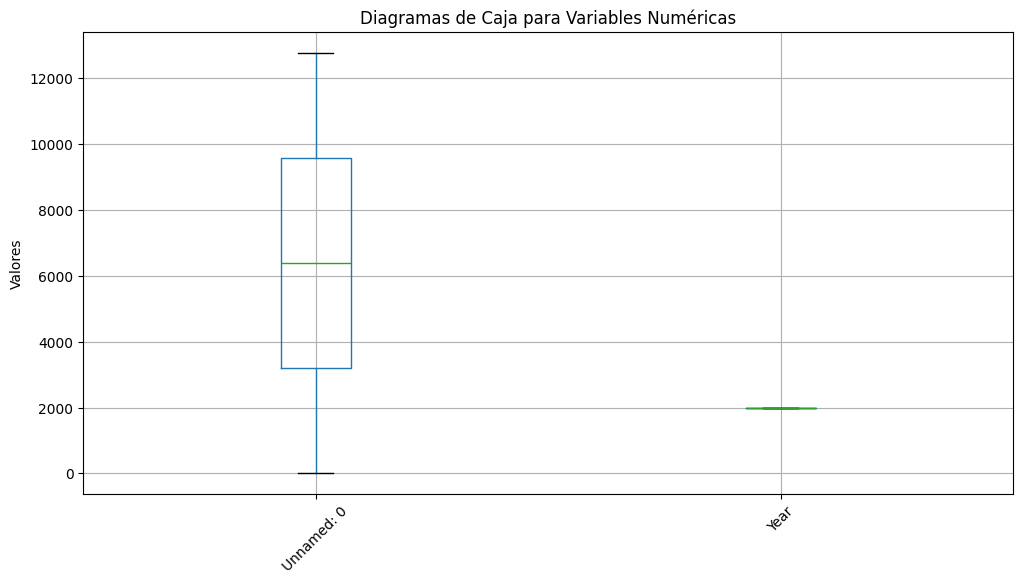

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cardinalidad(df_in, umbral_categoria, umbral_continua):
    # Crear una lista para almacenar los resultados
    resultados = []

    # Iterar sobre las columnas del dataframe
    for col in df_in.columns:
        valores_unicos = df_in[col].nunique()  # Cardinalidad
        total_valores = len(df_in[col])
        porcentaje = valores_unicos / total_valores if total_valores > 0 else 0  # Porcentaje de valores únicos

        # Clasificación del tipo de columna
        if valores_unicos == 2:
            tipo = "Binaria"
        elif valores_unicos < umbral_categoria:
            tipo = "Categórica"
        elif porcentaje >= umbral_continua:
            tipo = "Numerica Continua"
        else:
            tipo = "Numerica Discreta"

        # Añadir los resultados a la lista
        resultados.append({
            'columna': col,
            'cardinalidad': valores_unicos,
            'porcentaje_cardinalidad': porcentaje,
            'tipo': tipo
        })

    # Convertir la lista a un DataFrame
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

def analiza_frecuencias(df, columna):
    if columna not in df.columns:
        print(f"La columna {columna} no existe en el DataFrame.")
        return

    # Frecuencias absolutas
    frecuencias_abs = df[columna].value_counts()
    print(f"\nFrecuencias Absolutas para {columna}:")
    print(frecuencias_abs)

    # Frecuencias relativas
    frecuencias_rel = df[columna].value_counts(normalize=True)
    print(f"\nFrecuencias Relativas para {columna}:")
    print(frecuencias_rel)

    # Gráfico de frecuencias absolutas
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=columna, order=frecuencias_abs.index)
    plt.title(f"Frecuencia Absoluta de {columna}")
    plt.ylabel("Frecuencia")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de frecuencias relativas
    plt.figure(figsize=(10, 6))
    frecuencias_rel.plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia Relativa de {columna}")
    plt.ylabel("Porcentaje")
    plt.xlabel(columna)
    plt.xticks(rotation=45)
    plt.show()

def analizar_variables_numericas(df):
    # Seleccionar variables numéricas
    numericas = df.select_dtypes(include=['number'])

    # Calcular medidas de tendencia central, posición y rangos
    resumen = numericas.describe(percentiles=[0.25, 0.5, 0.75])
    print("\nMedidas de tendencia central, posición y rangos de las variables numéricas:")
    print(resumen)

    # Dibujar boxplots para cada variable numérica
    plt.figure(figsize=(12, 6))
    numericas.boxplot()
    plt.title("Diagramas de Caja para Variables Numéricas")
    plt.xticks(rotation=45)
    plt.ylabel("Valores")
    plt.show()

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

# Análisis de frecuencias de la columna "Major"
analiza_frecuencias(admission_data, "Major")

# Análisis de frecuencias de la columna "Gender"
analiza_frecuencias(admission_data, "Gender")

# Análisis de frecuencias de la columna "Admission"
analiza_frecuencias(admission_data, "Admission")

# Análisis de las medidas de tendencia central, posición y rangos y boxplots
analizar_variables_numericas(admission_data)


### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

Primeras filas del DataFrame de admisiones:
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected

Información general del DataFrame de admisiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None

Frecuencias Absolutas para Major:
Major
Other                                           

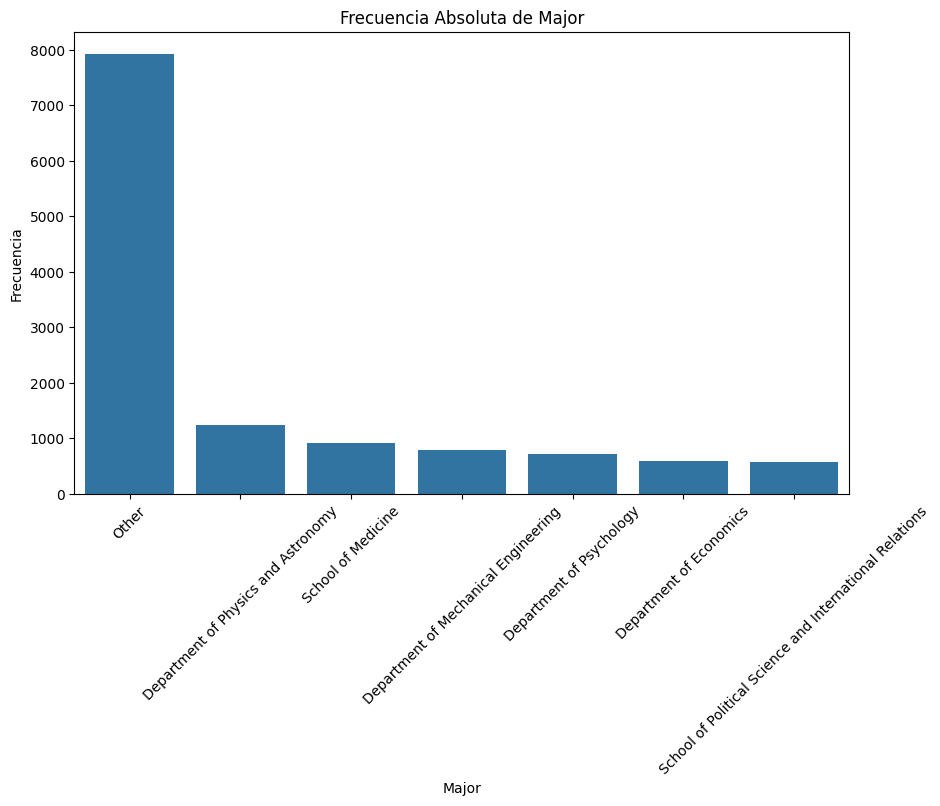

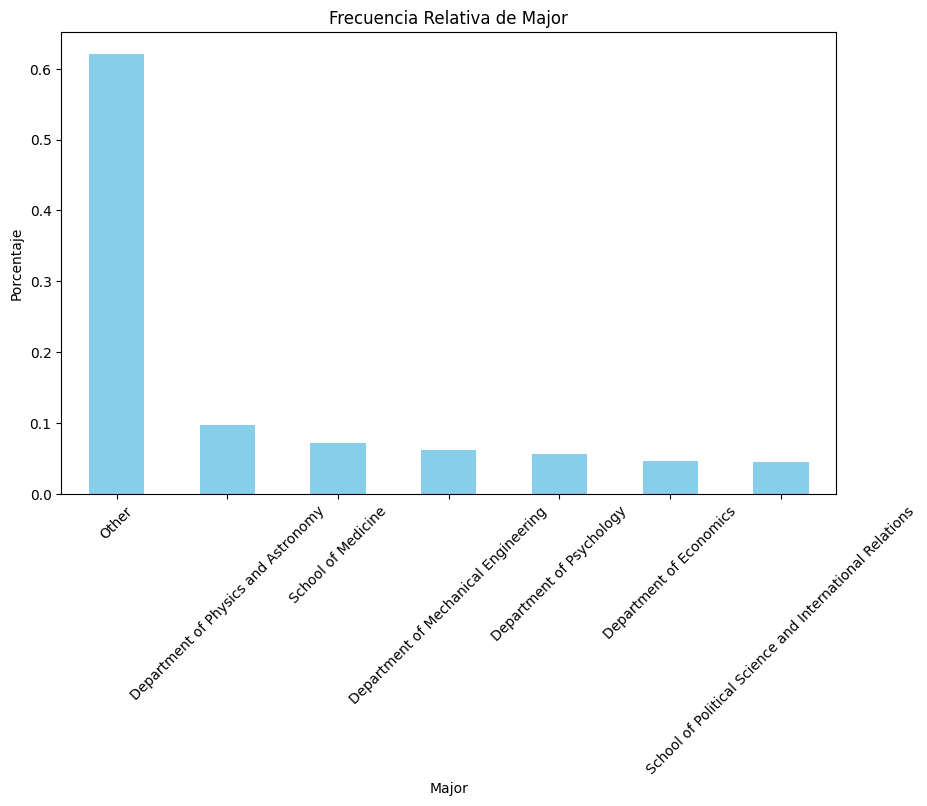


Frecuencias Absolutas para Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencias Relativas para Gender:
Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


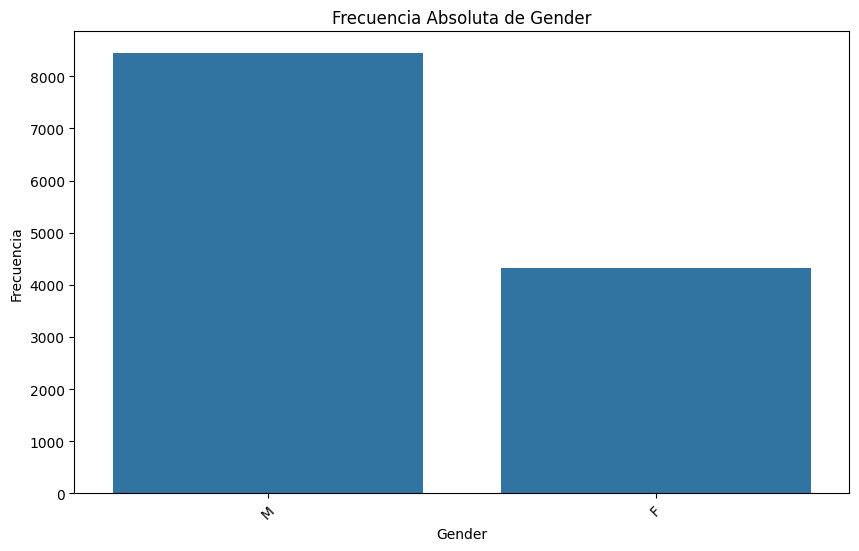

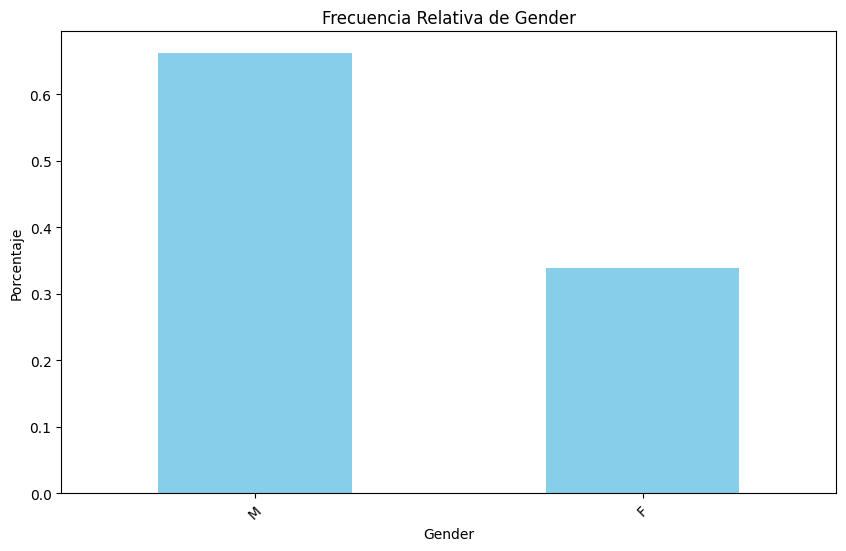


Frecuencias Absolutas para Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas para Admission:
Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


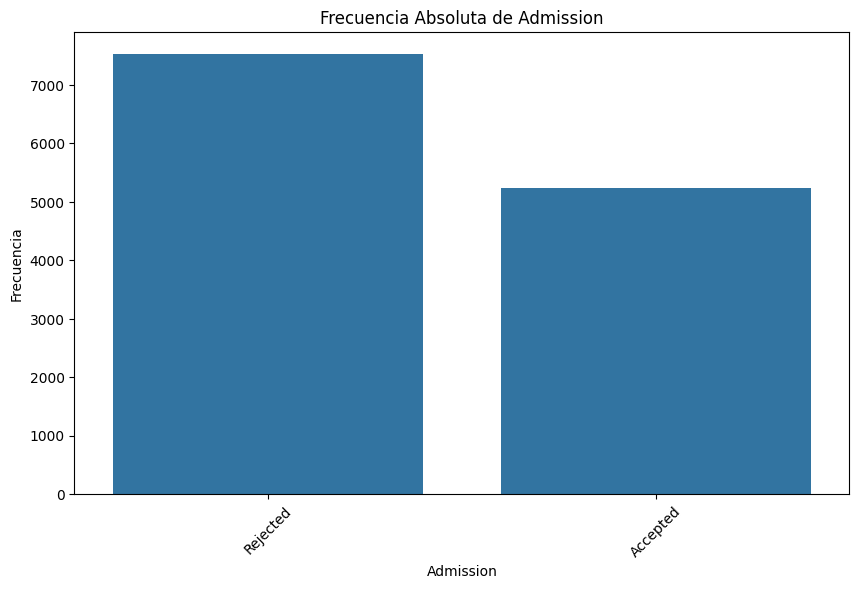

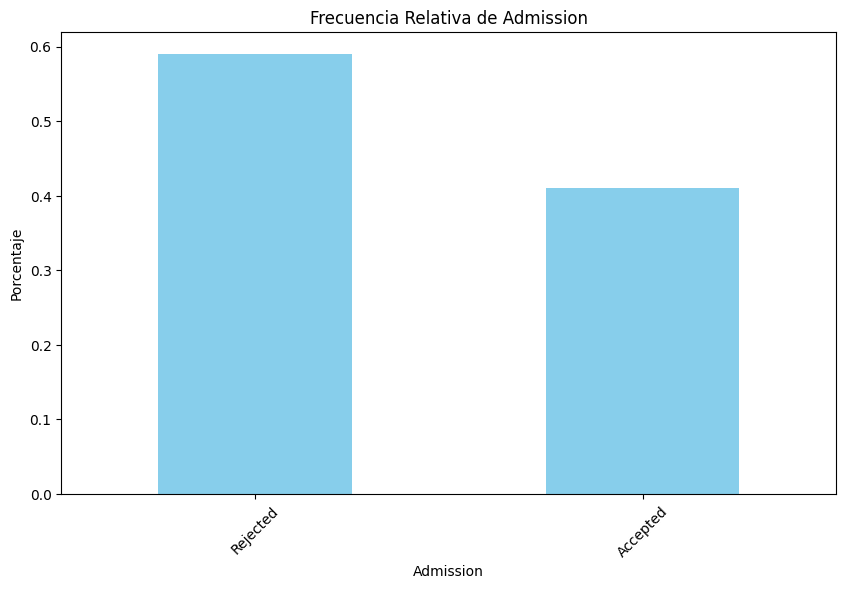


Medidas de tendencia central, posición y rangos de las variables numéricas:
         Unnamed: 0     Year
count  12763.000000  12763.0
mean    6381.000000   1973.0
std     3684.505078      0.0
min        0.000000   1973.0
25%     3190.500000   1973.0
50%     6381.000000   1973.0
75%     9571.500000   1973.0
max    12762.000000   1973.0


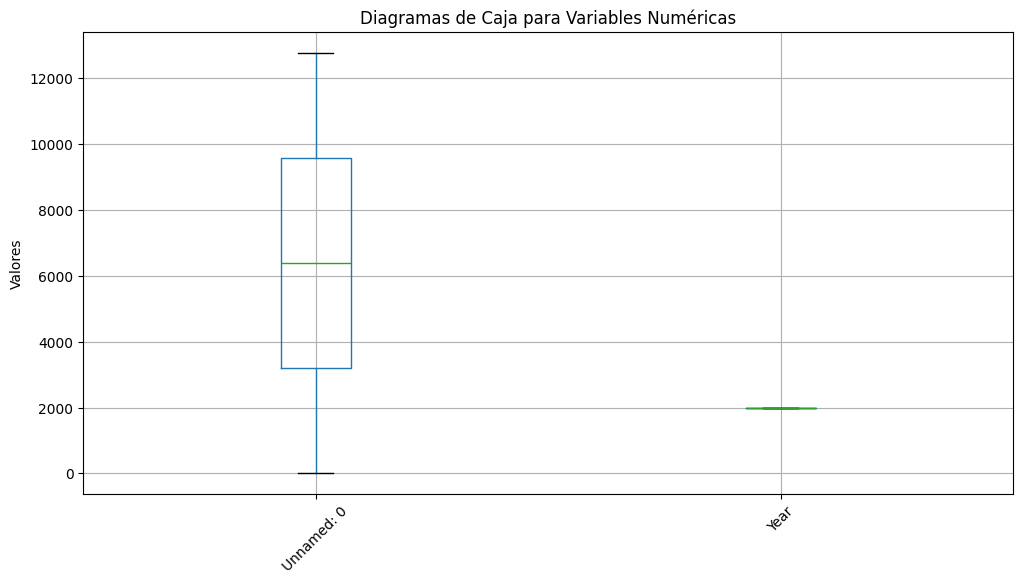


Análisis de la columna categórica: Major

Frecuencias Absolutas para Major:
Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

Frecuencias Relativas para Major:
Major
Other                                                      0.620857
Department of Physics and Astronomy                        0.097626
School of Medicine                                         0.071927
Department of Mechanical Engineering                       0.062054
Department of Psychology                                   0.055943
Department of Economics                                    0.0

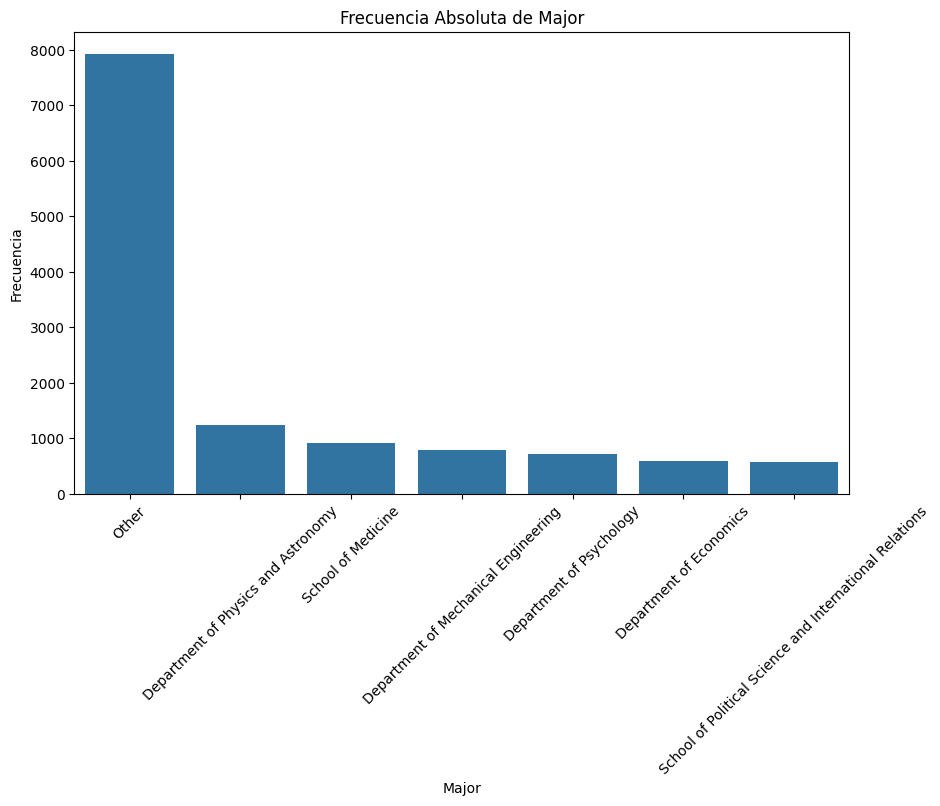

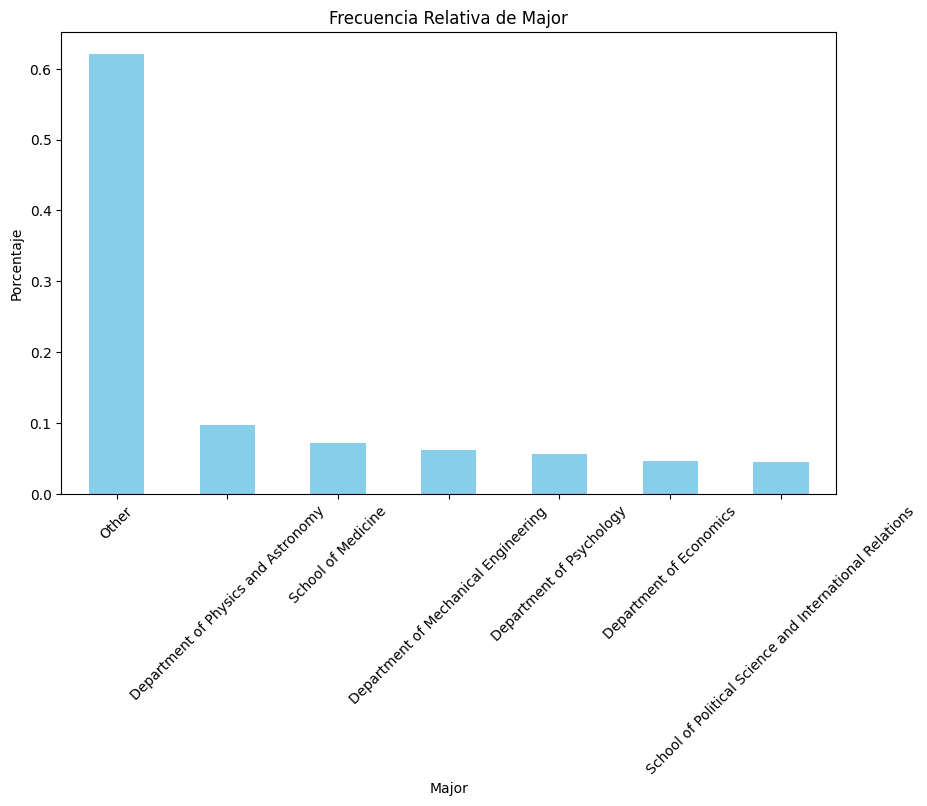


Análisis de la columna categórica: Gender

Frecuencias Absolutas para Gender:
Gender
M    8442
F    4321
Name: count, dtype: int64

Frecuencias Relativas para Gender:
Gender
M    0.661443
F    0.338557
Name: proportion, dtype: float64


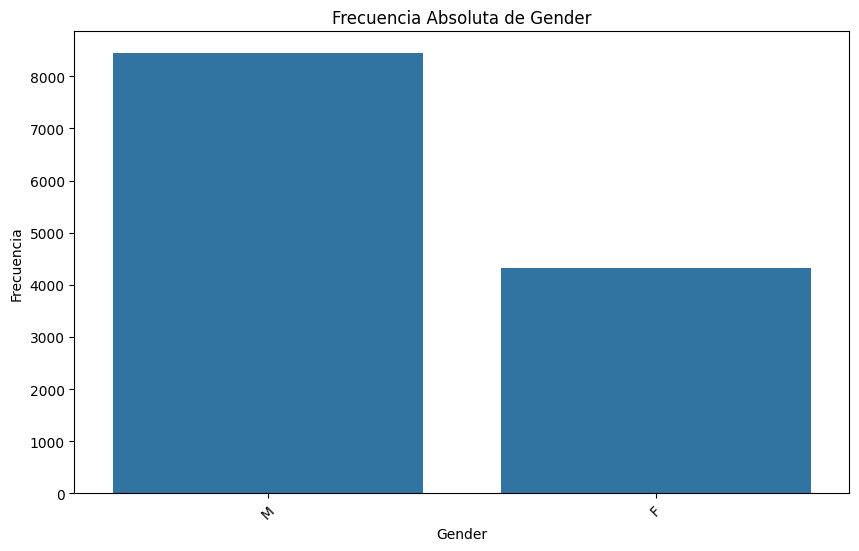

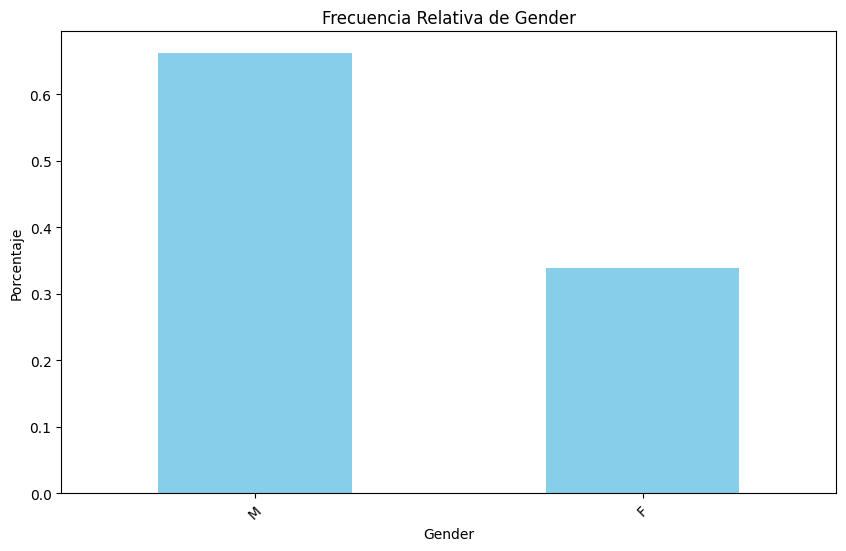


Análisis de la columna categórica: Admission

Frecuencias Absolutas para Admission:
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

Frecuencias Relativas para Admission:
Admission
Rejected    0.590065
Accepted    0.409935
Name: proportion, dtype: float64


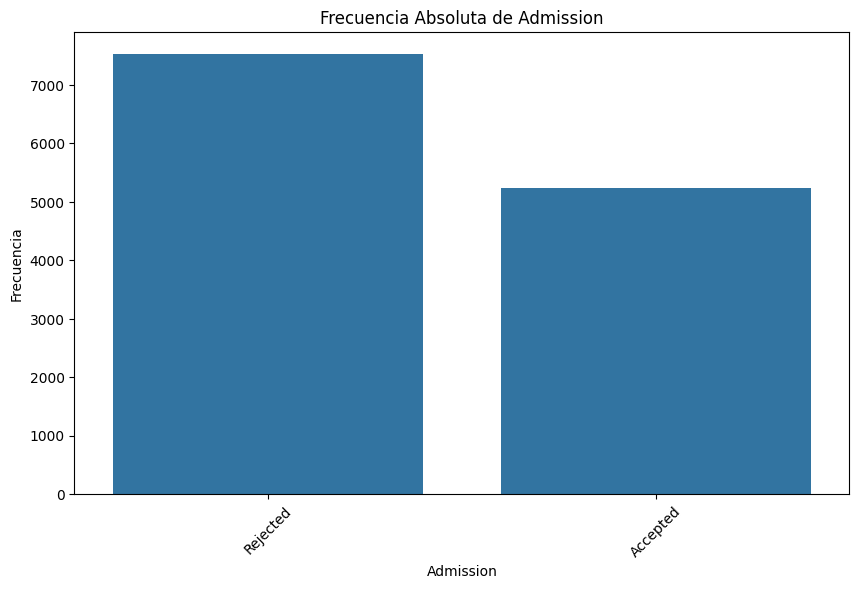

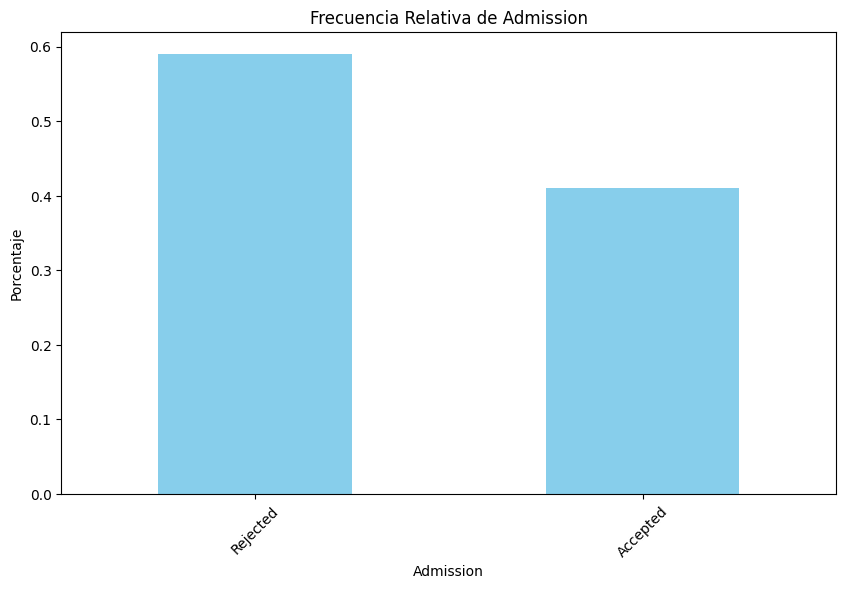

In [89]:
def analizar_categoricas(df):
    # Seleccionar variables categóricas
    categoricas = df.select_dtypes(include=['object', 'category'])

    for col in categoricas.columns:
        print(f"\nAnálisis de la columna categórica: {col}")
        analiza_frecuencias(df, col)

# Cargar el DataFrame desde un archivo CSV
ruta_csv_admission = "./data/admission_data.csv"
admission_data = pd.read_csv(ruta_csv_admission)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de admisiones:")
print(admission_data.head())

# Mostrar información general del DataFrame
print("\nInformación general del DataFrame de admisiones:")
print(admission_data.info())

# Análisis de frecuencias de la columna "Major"
analiza_frecuencias(admission_data, "Major")

# Análisis de frecuencias de la columna "Gender"
analiza_frecuencias(admission_data, "Gender")

# Análisis de frecuencias de la columna "Admission"
analiza_frecuencias(admission_data, "Admission")

# Análisis de las medidas de tendencia central, posición y rangos y boxplots
analizar_variables_numericas(admission_data)

# Análisis de variables categóricas
analizar_categoricas(admission_data)

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [90]:
def perfil_cliente(df, columnas):
    # Agrupar por las combinaciones más frecuentes
    combinacion_frecuente = df[columnas].mode().iloc[0]
    print("\nPerfil típico del cliente:")
    for col in columnas:
        print(f"{col}: {combinacion_frecuente[col]}")

# Cargar el DataFrame del dataset de seguros
ruta_csv_seguros = "./data/Marketing-Customer-Analysis.csv"
seguros_data = pd.read_csv(ruta_csv_seguros)

# Mostrar una parte del contenido del DataFrame
print("Primeras filas del DataFrame de seguros:")
print(seguros_data.head())

# Análisis del perfil típico del cliente
columnas_categoricas = ["education", "state", "employmentstatus", "gender", "marital_status", "vehicle_class", "vehicle_size"]
perfil_cliente(seguros_data, columnas_categoricas)


Primeras filas del DataFrame de seguros:
  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5     